In [96]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


In [97]:
car_df=pd.read_csv(r'/content/CarPrice_Assignment.csv')
car_df


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [98]:
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [99]:
x=car_df[['carlength',
'carwidth',
'carheight',
'enginesize',
'stroke',
'horsepower']]

In [100]:
x

,carlength,carwidth,carheight,enginesize,stroke,horsepower
0,168.8,64.1,48.8,130,2.68,111
1,168.8,64.1,48.8,130,2.68,111
2,171.2,65.5,52.4,152,3.47,154
3,176.6,66.2,54.3,109,3.40,102
4,176.6,66.4,54.3,136,3.40,115
...,...,...,...,...,...,...
200,188.8,68.9,55.5,141,3.15,114
201,188.8,68.8,55.5,141,3.15,160
202,188.8,68.9,55.5,173,2.87,134
203,188.8,68.9,55.5,145,3.40,106


In [101]:
y=car_df['price']
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [102]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =0)

In [103]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(164, 6)
(41, 6)
(164,)
(41,)


In [104]:
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [105]:
y_pred=mlr.predict(x_test)
y_pred

array([ 6908.14425514, 19495.13627927, 14319.09491064,  -331.18271714,
       11186.80077406, 14473.78433093,  6523.07954814,  6652.09175128,
       23109.9355772 ,  6913.15839955, 16511.88175771, 38252.1472424 ,
        7335.664091  , 11355.3426179 ,  6134.96457622, 14473.78433093,
       12120.42807991, 19609.70293218,  9439.30610208,  6289.59410618,
       10854.24471616, 16836.62420195, 11566.71962524, 14473.78433093,
       21785.40288478,  8205.37725737,  7574.31570408, 16293.58729743,
        7537.26696132,  6589.43812118, 10220.92990636, 11303.80954233,
       20312.94548702, 12288.11355671,  6589.43812118, 26449.03511682,
        9675.75628026, 17232.46567857,  5702.05157874, 39442.37129564,
        6134.96457622])

In [106]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 80.75


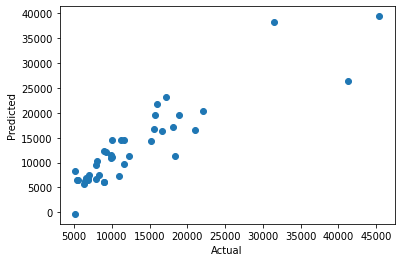

In [107]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

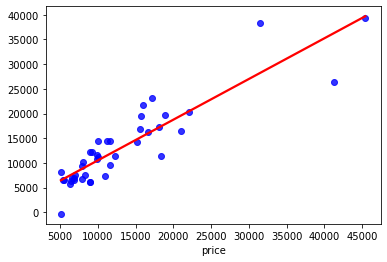

In [108]:
import seaborn as sns
sns.regplot(x=y_test,y=y_pred,ci=None,scatter_kws={"color": "blue"}, line_kws={"color": "red"});

In [109]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
52,6795.0,6908.144255,-113.144255
181,15750.0,19495.136279,-3745.136279
5,15250.0,14319.094911,930.905089
18,5151.0,-331.182717,5482.182717
188,9995.0,11186.800774,-1191.800774
170,11199.0,14473.784331,-3274.784331
76,5389.0,6523.079548,-1134.079548
154,7898.0,6652.091751,1245.908249
104,17199.0,23109.935577,-5910.935577
33,6529.0,6913.158400,-384.158400


In [110]:
pred_price=mlr.intercept_+mlr.coef_[0]*190.9+ mlr.coef_[1]*70.3+ mlr.coef_[2]*54.9+ mlr.coef_[3]*183+ mlr.coef_[4]*3.64+ mlr.coef_[5]*123
print(pred_price)


22827.285116330095
